<center><img alt="Analisando Airbnb" width="40%" src="https://tecnoblog.net/wp-content/uploads/2020/03/rio-de-janeiro.jpg"></center>

---

# Analisando dados sobre Violência - Rio de Janeiro, Brasil 

Cartão-postal do País, o Estado do Rio de Janeiro possui uma beleza incomparável, com grande diversidade de climas e paisagens, além de intensa vida cultural, que proporcionam excepcional diversão à população e aos turistas, há também atrativas oportunidades de investimento no Estado.

Porém ainda que com tantas qualidades, um velho problema que há muito tempo segue sendo um obstáculo no dia dia de todos os cidadãos: a violência urbana. No município ela está associada em grande parte ao tráfico de drogas, facções armadas criam verdadeiros cenários de guerra ao disputar o controle de territórios, favorecidas por uma rede de corrupção e pelo descaso histórico do poder público em relação às favelas nos morros cariocas, o Rio de Janeiro é o quinto estado brasileiro com maior taxa de homicídios, com 33 mortes para cada grupo de 100 mil habitantes.

Uma forma de validar esse índice de violência no estado do Rio de Jnaeiro é usando os dados disponibilizados através do portal ISPDados.

*O objetivo deste notebook é aplicar funções e comandos a fim de fixar o conteúdo proposto e desenvolver raciocínio lógico voltado à análise e exploração de dados, sendo estes referentes à violência no Rio de Janeiro, e ver quais insights podemos extrair a partir dos dados brutos*.

### Obtenção de dados

Todos os dados usados foram obtidos no portal ISPDados, a página de Dados Abertos do Instituto de Segurança Pública, as estatísticas la divulgadas são construídas a partir dos Registros de Ocorrência (RO) são lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de estruturar tudo de forma organizada e com qualidade, antes de serem consolidados no ISP os RO's são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

### Importando dados

In [1]:
#importando as bibliotecas usadas
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt

#importando os dados necessários
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

### Análise Inicial dos Dados

Com o objetivo de explorar os dados obtidos, é sempre muito importante enxergar e compreender as dimensões do seu Dataset.

In [2]:
#Tamanho do DataFrame
print(f'O DataFrame possui {df.shape[0]} linhas (entradas) e {df.shape[1]} colunas (variáveis)')

O DataFrame possui 344 linhas (entradas) e 56 colunas (variáveis)


In [87]:
#Descobrindo quais os nomes de cada coluna e o tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Feita esta análise, é possível notar que todas as colunas são do tipo int/float, classificação esta que de forma geral está correta se levarmos em conta o nome da coluna, ja que a ideia da tabela é trazer o número de casos (em valores) para cada crime cometido.

In [4]:
#Visualizando as 5 primeiras linhas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [5]:
#Cálculo do número de valores ausentes (em porcentagem)
((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending=False)

roubo_bicicleta               80.23
furto_bicicleta               80.23
apreensao_drogas_sem_autor    52.33
posse_drogas                  52.33
apf                           52.33
aaapai                        52.33
cmp                           52.33
trafico_drogas                52.33
cmba                          52.33
sequestro_relampago           41.86
furto_coletivo                41.86
extorsao                      41.86
furto_celular                 41.86
roubo_apos_saque              41.86
roubo_conducao_saque          41.86
roubo_cx_eletronico           41.86
estupro                       41.86
estelionato                   41.86
pol_civis_mortos_serv         41.86
pol_militares_mortos_serv     41.86
pessoas_desaparecidas         38.37
encontro_ossada               38.37
roubo_celular                 31.40
lesao_corp_culposa            27.91
ameaca                        27.91
sequestro                     27.91
lesao_corp_morte              27.91
registro_ocorrencias        

Uma questão que influencia seus dados de forma significativa são os valores ausentes, porém por mais que eles não existam, podem trazer alguns pontos importantes:

* Alguns desses crimes poderiam não estar sendo contabilizados ainda pelo orgão responsável;
* Possível falha no registro dos dados;
* Perca de informações durante digitalização de registros;
* Falho gerenciamento de informações.

### Informações Estatísticas sobre a Violência no Rio de Janeiro

Usando o método `describe()` podemos visualizar a distribuição estatística do dataframe.

Esse método nos permite obter informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.

In [62]:
#Visualizando o resumo estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,...,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,...,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,...,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,...,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,...,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,...,427.000000,60.500000,3.000000,2.000000,0.00000,590.000000,4190.000000,2322.000000,54926.500000,3.000000
75%,2012.000000,9.000000,577.250000,6.000000,19.000000,96.25000,398.250000,6582.500000,441.250000,236.250000,...,481.500000,87.000000,4.000000,3.000000,1.00000,649.000000,6872.750000,2778.000000,63292.500000,3.000000
max,2019.000000,12.000000,831.000000,21.000000,36.000000,194.00000,645.000000,9050.000000,561.000000,449.000000,...,628.000000,217.000000,13.000000,10.000000,3.00000,848.000000,13833.000000,5358.000000,75403.000000,3.000000


### Atentados contra o patrimônio - Veículos

Uma vez que há dados voltados a roubo, furto e recuperação de veículos, este tópico da análise será dedicado a este problema muito comum em grandes centros urbanos.

Com isso o objetivo é relacionar estes 3 tópicos a fim de extrair algumas conclusões.

In [7]:
#Média de carros roubados
mean_veiculo_roubado = round(df.roubo_veiculo.mean())
print(f'O número em média de carros roubados por mês é de: {mean_veiculo_roubado} dos carros')


O número em média de carros roubados por mês é de: 2449 dos carros


In [8]:
#Média de carros furtados
mean_veiculo_furtado = round(df.furto_veiculos.mean())
print(f'O número em média de carros furtados é de: {mean_veiculo_furtado} dos carros')


O número em média de carros furtados é de: 1675 dos carros


In [9]:
#Media de veículos recuperados
mean_veiculo_recuperado = round(df.recuperacao_veiculos.mean())
print(f'O número em média de carros recuperados é de: {mean_veiculo_recuperado} dos carros')


O número em média de carros recuperados é de: 1772 dos carros


In [10]:
#Porcentagem da quntidade de carros que é recuperada
total_recuperado = (mean_veiculo_recuperado) / ((mean_veiculo_roubado) + (mean_veiculo_furtado))
percentage_of_recuperado = round(total_recuperado * 100, 2)
print(f'A porcentagem de carros recuperados é de: {percentage_of_recuperado}% dos carros')


A porcentagem de carros recuperados é de: 42.97% dos carros


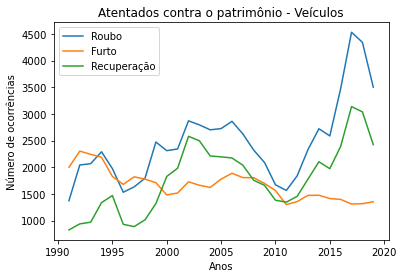

In [38]:
# Agrupando dados com relação ao ano
grouped = df_plot[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].groupby(df_plot['vano'])
# Descobrindo a média de ocorrências por ano
grouped = grouped.mean()
# Plot da relação entre as três colunas ao decorrer dos anos
grouped.plot()
# Edição do gráfico
plt.title('Atentados contra o patrimônio - Veículos')
plt.xlabel('Anos')
plt.ylabel('Número de ocorrências')
plt.legend(['Roubo', 'Furto', 'Recuperação']);

Com o gráfio é possível notar então que:
    
* O número de furtos ainda que contendo alguns picos, está diminuindo;
* O número de roubos teve uma alta bastante significativa, porém hoje se encontra em leve queda;
* A linha de veículo recuperados sempre acompanha a de número de roubos, porém nunca a ultrapassa.

### Atentados contra a vida

In [39]:
#Número máximo e mínimo de homicídios dolosos
max_hom_doloso = df.hom_doloso.max()
print(f'O número máximo de homicídios dolosos é de: {max_hom_doloso} mortes')
min_hom_doloso = df.hom_doloso.min()
print(f'O número mínimo de homicídios dolosos é de: {min_hom_doloso} mortes')

O número máximo de homicídios dolosos é de: 831 mortes
O número mínimo de homicídios dolosos é de: 272 mortes


In [80]:
# Localizando os dados da linhas com mais homicídios dolosos
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,...,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [81]:
# Localizando os dados da linhas com menos homicídios dolosos
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
2,272,272,272,272.0,272,272.0,272,272,272.0,272.0,...,272.0,272,272.0,272.0,272.0,272,272,272,272.0,272
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,...,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


A partir destes dados então, conseguimos dizer que o mês de Janeiro de 1995 foi o mês com mais casos de homicídios dolosos registrados no nosso dataset, enquanto o posto de mês com menor número de casos foi Junho de 2015.

Fato que da indícios então de que talvez este tipo de crima esteja diminuindo, porém para afirmar tal coisa, somente uma análise mais aprofundada/específica.

---

### Conclusão

De fato obtivemos bons insigths a partir deste notebook, seja analisando e buscando alguma relação entre as variáveis como no caso dos crimes envolvendo veículos ou simplesmente observando os números do DataFrame e identificando possíveis baixas ou aumentos nos homicídos dolosos.

Com isso foi possível melhorar então a linha de raciocínio lógico de análise e exploração de dados, assim como aprender a usar de forma mais eficiente algumas funções e comandos.